In [29]:
# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 사용하는 한글 폰트 경로 설정
font_prop = fm.FontProperties(fname=font_path, size=14)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import os
import pandas as pd

folder_path = "C:\\Users\\TG\\Desktop\\maintenance_cost"

data_list = []

# 2020년부터 2024년까지 각 연도의 1~12월 파일 병합
for year in range(2020, 2025):
    for month in range(1, 13):
        file_name = f"자치구별 관리비 통계({year}.{month:02d}).xlsx"
        file_path = os.path.join(folder_path, file_name)
        
        if os.path.exists(file_path):
            xls = pd.ExcelFile(file_path)
            df = pd.read_excel(xls, sheet_name=xls.sheet_names[0])
            
            df['년도'] = year
            df['월'] = month
            
            data_list.append(df)

final_df = pd.concat(data_list, ignore_index=True)

print(final_df)
df = final_df.sort_index(axis = 0)
df.to_csv("자치구별_통계.csv", index = False, encoding="utf-8-sig")

공용관리비용 이상치 개수: 46


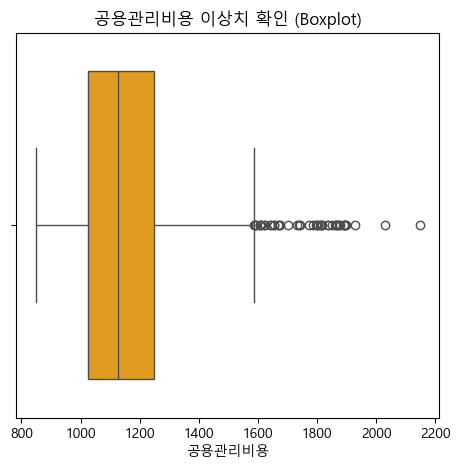

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')  
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지

column_name = "공용관리비용"
df[column_name] = pd.to_numeric(df[column_name], errors='coerce')  # 숫자로 변환, 오류 시 NaN 처리

# 결측값 개수 확인
missing_values = df[column_name].isnull().sum()

# 이상치 탐색: IQR 방식 사용
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 여부 확인
outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

# 시각화: 결측값 및 이상치 그래프
plt.figure(figsize=(12, 5))

# Boxplot (이상치 확인)
plt.subplot(1, 2, 1)
sns.boxplot(x=df[column_name], color='orange')
plt.title("공용관리비용 이상치 확인 (Boxplot)")

# 이상치 및 결측값 정보 출력
print(f"공용관리비용 이상치 개수: {outliers.shape[0]}")


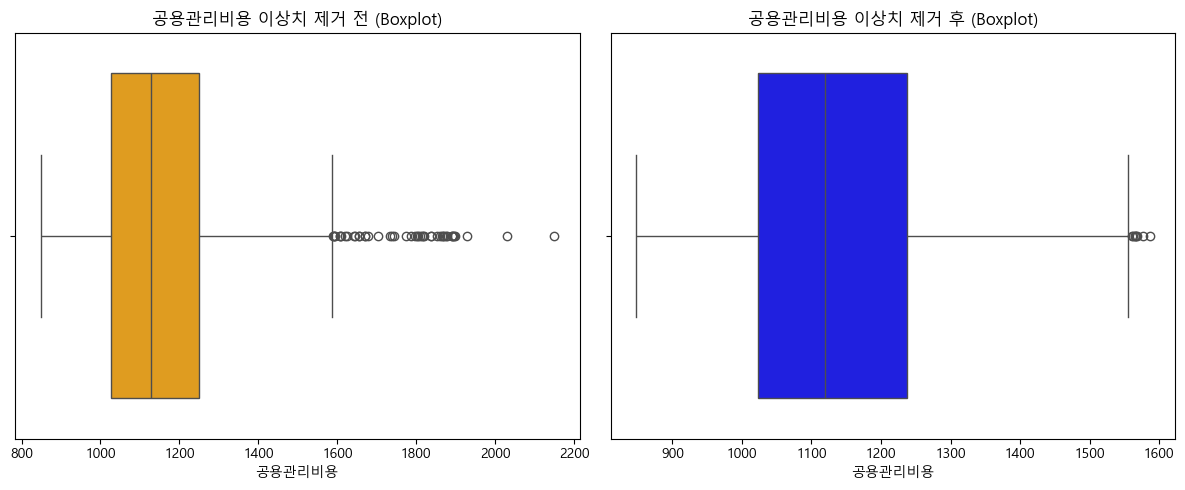

공용관리비용 이상치 제거 전 갯수: 1560
이상치 제거 후 데이터 개수: 1514


In [37]:
# 이상치 제거
df_cleaned = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# 이상치 제거 후 결측값 재확인
missing_values_after = df_cleaned[column_name].isnull().sum()

# 시각화: 이상치 제거 전/후 비교
plt.figure(figsize=(12, 5))

# Boxplot (이상치 제거 전)
plt.subplot(1, 2, 1)
sns.boxplot(x=df[column_name], color='orange')
plt.title("공용관리비용 이상치 제거 전 (Boxplot)")

# Boxplot (이상치 제거 후)
plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned[column_name], color='blue')
plt.title("공용관리비용 이상치 제거 후 (Boxplot)")

plt.tight_layout()
plt.show()

# 이상치 및 결측값 정보 출력
print(f"공용관리비용 이상치 제거 전 갯수: {df.shape[0]}")
print(f"이상치 제거 후 데이터 개수: {df_cleaned.shape[0]}")

In [38]:
import pandas as pd

# 예시로 사용할 데이터프레임 생성 (여기서는 df_cleaned를 사용한다고 가정)
# 지역별 "공용관리비용" 평균 계산
average_management_fees = df_cleaned.groupby("지역")["공용관리비용"].mean().reset_index()

# 평균 계산 결과 출력
print(average_management_fees)

# 결과를 인덱스 없이 CSV 파일로 저장
average_management_fees = average_management_fees.sort_values(by="지역")  # 지역별로 정렬
average_management_fees.to_csv("자치구별_관리비_평균.csv", index=False, encoding="utf-8-sig")

        지역       공용관리비용
0      강남구  1374.466327
1      강동구  1054.087333
2      강북구  1059.125333
3      강서구  1000.807167
4      관악구   931.427833
5      광진구  1327.871333
6      구로구   969.663000
7      금천구   949.601500
8      노원구  1159.282333
9      도봉구  1064.267000
10    동대문구  1008.996833
11     동작구  1133.237833
12     마포구  1186.264500
13    서대문구  1115.955000
14  서울시 전체  1156.362000
15     서초구  1350.555763
16     성동구  1135.935667
17     성북구   980.423333
18     송파구  1170.975833
19     양천구  1263.008167
20    영등포구  1218.536000
21     용산구  1534.738077
22     은평구  1068.565833
23     종로구  1263.384500
24      중구  1336.024333
25     중랑구  1037.668500
